In [38]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
import math
import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [2]:
import os 
import pandas as pd 

In [120]:
path = os.getcwd()
files = os.listdir(path)
files_xls = [f for f in files if f[-3:] == "xls"] # save the excel file names

In [147]:
data_sp = pd.DataFrame()
for file in files_xls : 
    if (file[-6:-4] == "sp") : # get juste the spring data during 2021
    #  df = pd.read_excel(file)
    #  data_sp.join(df)
        data_sp = pd.concat([data_sp, pd.read_excel(file, "Data",usecols=["DATE-TIME","SM (0-5cm)","Temp 2.5cm"], header=1)], axis=1)

#get only srping data
data_sp = data_sp.drop(0, axis=0) # drop units row
data_sp =  data_sp.iloc[:, [i for i in range(data_sp.shape[1]) if i not in [3,6,9,12]]] # drop useless columns
data_sp.columns = ['DATE-TIME', 'SM1', 'Temp1', 'SM2', 'Temp2','SM3', 'Temp3','SM4', 'Temp4','SM5', 'Temp5']


In [ ]:
data_sp.describe()

In [148]:
#get rid of outranged soil moisture values like -99
last_measure = 0
for index , row in data_sp.iterrows() : 
    if row.SM1 > 0 :
         last_measure = row.SM1
    else :
        data_sp.at[index, "SM1"] = last_measure


In [149]:
#get rid of outranged temperature values like -99

last_measure = 0
for index , row in data_sp.iterrows() : 
    if row.Temp1 > 0 :
         last_measure = row.Temp1
    else :
        data_sp.at[index, "Temp1"] = last_measure

In [150]:
data_sp["Hour"] = data_sp["DATE-TIME"].dt.hour
# data_sp["Month"] = data_sp["DATE-TIME"].dt.month

In [151]:
data_sp["Hour_sin"] = data_sp["Hour"].apply(lambda x: math.sin(2*math.pi*x/24))
data_sp["Hour_cos"] = data_sp["Hour"].apply(lambda x: math.cos(2*math.pi*x/24))
# data_sp["Month_sin"] = data_sp["Month"].apply(lambda x: math.sin(2*math.pi*x/12))
# data_sp["Month_cos"] = data_sp["Month"].apply(lambda x: math.cos(2*math.pi*x/12))

In [11]:
# get the summer data if we want to extend our data set
# data_sum = pd.DataFrame()
# for file in files_xls : 
#     if (file[-6:-4] == "su") :
#     #  df = pd.read_excel(file)
#     #  data_sp.join(df)
#         data_sum = pd.concat([data_sum, pd.read_excel(file, "Data",usecols=["DATE-TIME","SM (0-5cm)","Temp 2.5cm"], header=1)], axis=1)

# data_sum = data_sum.drop(0, axis=0) # drop units row
# data_sum =  data_sum.iloc[:, [i for i in range(data_sum.shape[1]) if i not in [3,6]]] # drop useless columns
# data_sum.columns = ['DATE-TIME', 'SM1', 'Temp1', 'SM2', 'Temp2','SM3', 'Temp3']

In [152]:
import plotly.express as px

fig = px.line(data_sp, x='DATE-TIME', y=["SM1", "SM2", "SM3","SM4","SM5"] )
fig.show()

In [8]:
# period1 = pd.to_datetime("2020-09-08 00:00:00")
# period2 = pd.to_datetime("2020-09-08 18:40:00")

# period3 = pd.to_datetime("2020-09-13 04:20:00")
# period4 = pd.to_datetime("2020-09-08 09:00:00")

# period5 = pd.to_datetime("2020-09-19 21:00:00")
# period6 = pd.to_datetime("2020-09-20 16:40:00")

# period7 = pd.to_datetime("2020-09-25 02:20:00")
# period8 = pd.to_datetime("2020-09-25 15:00:00")

# period9 = pd.to_datetime("2020-09-30 14:40:00")
# period10 = pd.to_datetime("2020-09-30 15:40:00")

# period11 = pd.to_datetime("2020-10-06 10:00:00")
# period12 = pd.to_datetime("2020-10-08 11:40:00")

# period13 = pd.to_datetime("2020-10-17 15:00:00")
# period14 = pd.to_datetime("2020-10-17 22:00:00")

# period15 = pd.to_datetime("2020-10-23 19:00:00")
# period16 = pd.to_datetime("2020-10-26 13:00:00")

# here i want to cut the increased soil moisture period in order to avoid the model to catch the irrigation periods that 
# have no sense to simulate or predict because it's a improbable stocastic event
periods = [pd.to_datetime("2020-09-08 00:00:00"), pd.to_datetime("2020-09-08 18:40:00"),
           pd.to_datetime("2020-09-13 04:20:00"), pd.to_datetime("2020-09-08 09:00:00"),
           pd.to_datetime("2020-09-19 21:00:00"), pd.to_datetime("2020-09-20 16:40:00"),
           pd.to_datetime("2020-09-25 02:20:00"), pd.to_datetime("2020-09-25 15:00:00"),
           pd.to_datetime("2020-09-30 14:40:00"), pd.to_datetime("2020-09-30 15:40:00"),
           pd.to_datetime("2020-10-06 10:00:00"), pd.to_datetime("2020-10-08 11:40:00"),
           pd.to_datetime("2020-10-17 15:00:00"), pd.to_datetime("2020-10-17 22:00:00"),
           pd.to_datetime("2020-10-23 19:00:00"), pd.to_datetime("2020-10-26 13:00:00")]



In [153]:
import plotly.express as px
fig = px.line(data_sp, x='DATE-TIME', y=["SM1", "SM2", "SM3","SM4","SM5"], title="Soil moisture variation in 3 different acquisition sensors" )
fig.show()

In [155]:
# I did the mean of temperatures because in a greenhouse we can suppose that 
# the temp is the same in every space point, and the fluctuations are neglected
data_sp["TEMP"] = data_sp[["Temp1","Temp2","Temp3","Temp4","Temp5"]].mean(axis=1)

In [156]:
import plotly.express as px
fig = px.line(data_sp, x='DATE-TIME', y=["TEMP"] , title="Température moyenne")
fig.show()

In [157]:
data_sp

DATE-TIME        SM1      Temp1        SM2      Temp2  \
1    2020-09-01 00:00:00  28.193435   8.553029  14.848556  13.775635   
2    2020-09-01 00:20:00  28.366863   8.344468  14.836311  13.990613   
3    2020-09-01 00:40:00  27.965523   8.148724  14.931211  14.935325   
4    2020-09-01 01:00:00  27.917563   8.062903  15.031868  13.487338   
5    2020-09-01 01:20:00  28.078661   7.901517  15.065358  13.051603   
...                  ...        ...        ...        ...        ...   
6548 2020-11-30 22:20:00  17.168142  26.114636  12.638375  23.204516   
6549 2020-11-30 22:40:00  16.843229  25.690989  12.325705  23.099058   
6550 2020-11-30 23:00:00  16.818482  25.396367  12.327344  22.951077   
6551 2020-11-30 23:20:00  17.046133  25.151016  12.329718  22.877673   
6552 2020-11-30 23:40:00    17.2625  24.957955  12.330031  22.857824   

            SM3      Temp3        SM4      Temp4        SM5      Temp5  Hour  \
1     20.017364   7.492237  21.886789   8.927692  29.843542   7.197511     0   
2     20.071595   7.350349  21.875434   8.677515   29.87585   7.018653     0   
3     20.072602   7.235666  21.906033    8.44074  29.888399    6.82167     0   
4      19.84994   7.123209  21.685439   8.268012  29.899268   6.667015     1   
5     20.047215   6.973112   21.80357   8.064851   29.69635   6.492305     1   
...         ...        ...        ...        ...        ...        ...   ...   
6548   7.857014  27.555679  10.233789  28.441394   11.46712  23.897298    22   
6549   7.572637  27.249859   10.20222  28.090094  11.662558  23.720652    22   
6550   7.563103  26.971673  10.197991   27.96484  11.665713  23.649668    23   
6551   7.486207  26.700066   9.900325  27.401634  11.164952  23.435888    23   
6552   7.936324  26.521835   9.899964  27.369066  11.365206  23.308498    23   

      Hour_sin  Hour_cos       TEMP  
1     0.000000  1.000000   9.189221  
2     0.000000  1.000000   9.076320  
3     0.000000  1.000000   9.116425  
4     0.258819  0.965926   8.721696  
5     0.258819  0.965926   8.496678  
...        ...       ...        ...  
6548 -0.500000  0.866025  25.842704  
6549 -0.500000  0.866025  25.570130  
6550 -0.258819  0.965926  25.386725  
6551 -0.258819  0.965926  25.113255  
6552 -0.258819  0.965926  25.003036  

[6552 rows x 15 columns]

In [158]:
#drop the temperature measures and keep only the mean
# data_sp_presequence= data_sp.drop(["Temp1","Temp2","Temp3","Hour"] ,axis=1)
data_sp_presequence= data_sp.drop(["Temp1","Temp2","Temp3","Temp4","Temp5","Hour"] ,axis=1)

In [160]:
def MinMaxScale(array, min, max):

    return (array - min) / (max - min)

In [161]:
data_sp_presequence.columns

Index(['DATE-TIME', 'SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'Hour_sin', 'Hour_cos',
       'TEMP'],
      dtype='object')

In [162]:
min_SM1 = data_sp_presequence["SM1"].min()
max_SM1 = data_sp_presequence["SM1"].max()
min_SM2 = data_sp_presequence["SM2"].min()
max_SM2 = data_sp_presequence["SM2"].max()
min_SM3 = data_sp_presequence["SM3"].min()
max_SM3 = data_sp_presequence["SM3"].max()
min_SM4 = data_sp_presequence["SM4"].min()
max_SM4 = data_sp_presequence["SM4"].max()
min_SM5 = data_sp_presequence["SM5"].min()
max_SM5 = data_sp_presequence["SM5"].max()
min_TEMP = data_sp_presequence["TEMP"].min()
max_TEMP = data_sp_presequence["TEMP"].max()

data_sp_presequence["SM1"] = MinMaxScale(data_sp_presequence["SM1"], min_SM1, max_SM1)
data_sp_presequence["SM2"] = MinMaxScale(data_sp_presequence["SM2"], min_SM2, max_SM2)
data_sp_presequence["SM3"] = MinMaxScale(data_sp_presequence["SM3"], min_SM3, max_SM3)
data_sp_presequence["SM4"] = MinMaxScale(data_sp_presequence["SM4"], min_SM4, max_SM4)
data_sp_presequence["SM5"] = MinMaxScale(data_sp_presequence["SM5"], min_SM5, max_SM5)
data_sp_presequence["TEMP"] = MinMaxScale(data_sp_presequence["TEMP"], min_TEMP, max_TEMP)


In [163]:
data_sp_presequence = data_sp_presequence.drop("DATE-TIME", axis=1)


In [164]:
for col in data_sp_presequence.columns : # I found that the SM columns was objects so we must convert them into floats
  data_sp_presequence[col] = data_sp_presequence[col].astype("float64")

In [165]:
data_sp_presequence

SM1       SM2       SM3       SM4       SM5  Hour_sin  Hour_cos  \
1     0.603513  0.070230  0.669162  0.461873  0.706813  0.000000  1.000000   
2     0.612439  0.069889  0.671959  0.461472  0.708036  0.000000  1.000000   
3     0.591782  0.072531  0.672011  0.462551  0.708511  0.000000  1.000000   
4     0.589314  0.075333  0.660528  0.454773  0.708922  0.258819  0.965926   
5     0.597605  0.076265  0.670702  0.458938  0.701243  0.258819  0.965926   
...        ...       ...       ...       ...       ...       ...       ...   
6548  0.036036  0.008704  0.042037  0.050970  0.011434 -0.500000  0.866025   
6549  0.019313  0.000000  0.027372  0.049857  0.018830 -0.500000  0.866025   
6550  0.018039  0.000046  0.026880  0.049708  0.018949 -0.258819  0.965926   
6551  0.029757  0.000112  0.022914  0.039212  0.000000 -0.258819  0.965926   
6552  0.040893  0.000120  0.046128  0.039199  0.007578 -0.258819  0.965926   

          TEMP  
1     0.093571  
2     0.089629  
3     0.091029  
4     0.077247  
5     0.069391  
...        ...  
6548  0.675017  
6549  0.665500  
6550  0.659097  
6551  0.649549  
6552  0.645701  

[6552 rows x 8 columns]

In [109]:
# train_size = int(len(X) * 0.8)
# rest_size = int(len(X) * 0.1)

# X_train, y_train = X[:train_size], y[:train_size]
# X_val, y_val = X[train_size:train_size+rest_size], y[train_size:train_size+rest_size]
# X_test, y_test = X[train_size+rest_size:], y[train_size+rest_size:]

In [112]:
# import torch
# def make_Tensor(array):
#     array=np.vstack(array)
#     return torch.from_numpy(array).unsqueeze(2) #unsqueeze to get a 3D array

In [113]:
# X_train = make_Tensor(X_train)
# y_train = make_Tensor(y_train)
# X_val = make_Tensor(X_val)
# y_val = make_Tensor(y_val)
# X_test = make_Tensor(X_test)
# y_test = make_Tensor(y_test)

In [202]:
# import tensorflow as tf

In [191]:
# tf.keras.backend.clear_session()

In [208]:
# BATCH_SIZE = 256
# BUFFER_SIZE = 200

# train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
# train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
# val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [209]:
# lstm_model = tf.keras.models.Sequential([
#     tf.keras.layers.LSTM(64, input_shape=x_train_uni.shape[-2:]),
#     tf.keras.layers.Dense(6, activation='linear')
# ])

# lstm_model.compile(optimizer='adam', loss='mae')

In [211]:
# early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)
# history = lstm_model.fit(train_univariate,
#                       epochs=EPOCHS,
#                       steps_per_epoch=EVALUATION_INTERVAL,
#                       validation_data=val_univariate,
#                       callbacks=[early_stopping],
#                       validation_steps=50)

Epoch 1/60
200/200 [==============================] - 9s 33ms/step - loss: 0.2752 - val_loss: 0.2676
Epoch 2/60
200/200 [==============================] - 7s 35ms/step - loss: 0.2248 - val_loss: 0.2428
Epoch 3/60
200/200 [==============================] - 7s 35ms/step - loss: 0.1752 - val_loss: 0.2453
Epoch 4/60
200/200 [==============================] - 7s 33ms/step - loss: 0.1546 - val_loss: 0.2308
Epoch 5/60
200/200 [==============================] - 7s 34ms/step - loss: 0.1315 - val_loss: 0.1570
Epoch 6/60
200/200 [==============================] - 7s 34ms/step - loss: 0.1109 - val_loss: 0.1902
Epoch 7/60
200/200 [==============================] - 7s 37ms/step - loss: 0.0976 - val_loss: 0.1424
Epoch 8/60
200/200 [==============================] - 7s 35ms/step - loss: 0.0902 - val_loss: 0.2070
Epoch 9/60
200/200 [==============================] - 7s 34ms/step - loss: 0.0940 - val_loss: 0.1327
Epoch 10/60
200/200 [==============================] - 7s 36ms/step - loss: 0.0844 - val_lo

In [ ]:
# plot_train_history(history,
#                    'Single Step Training and validation loss')

# Show predicition

In [ ]:
# x_train_uni

In [256]:
# lstm_model.predict(x_train_uni[100])[0]

1/1 [==============================] - 0s 49ms/step


array([ 0.16015975, -0.031765  , -0.03217597, -0.3068188 ,  0.19469212,
        0.51654744], dtype=float32)

In [255]:
# y_train_uni[100]

array([ 0.57885446,  0.06445244,  0.61648842,  0.5       , -0.8660254 ,
        0.18996397])

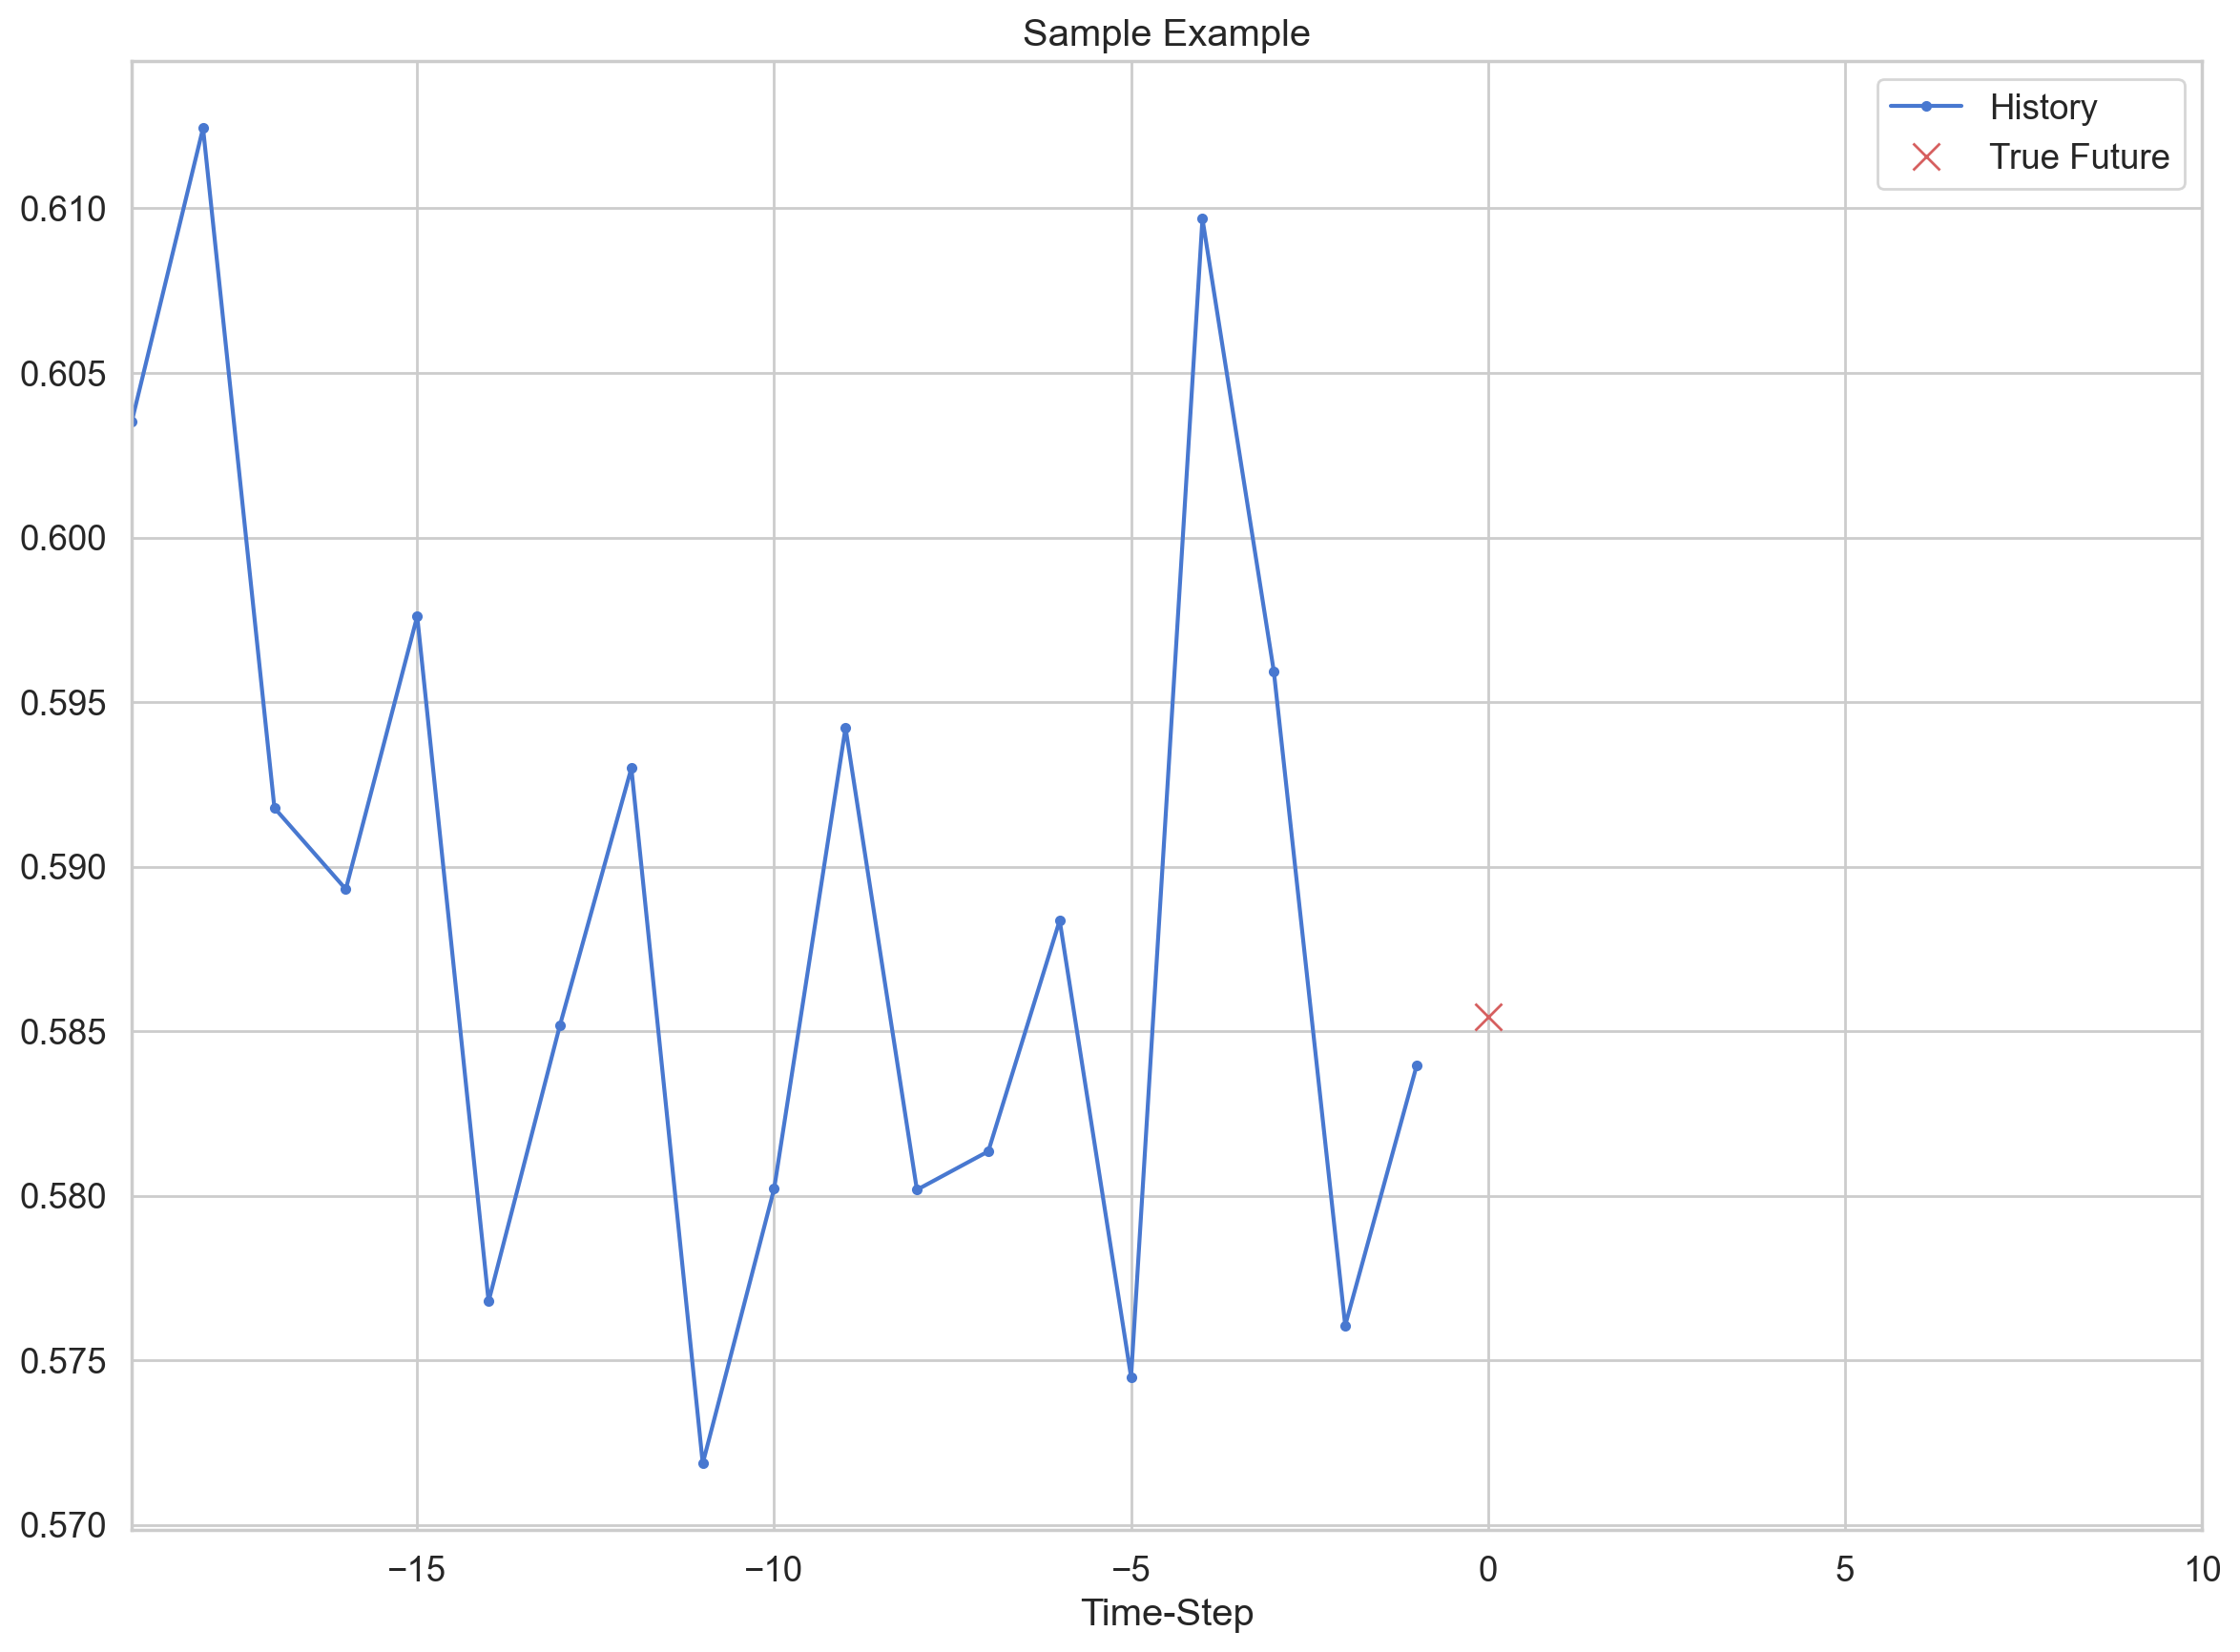

In [229]:
# show_plot([data_sp_presequence.iloc[0:19,0].to_numpy(), y_train_uni[2][0], lstm_model.predict(x)[0]],
#                      0, 'Sample Example')
# plot.show()

In [166]:
# data_sp_multi =  data_sp_presequence.drop(["Hour_sin","Hour_cos"], axis=1)
data_sp_multi =  data_sp_presequence

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

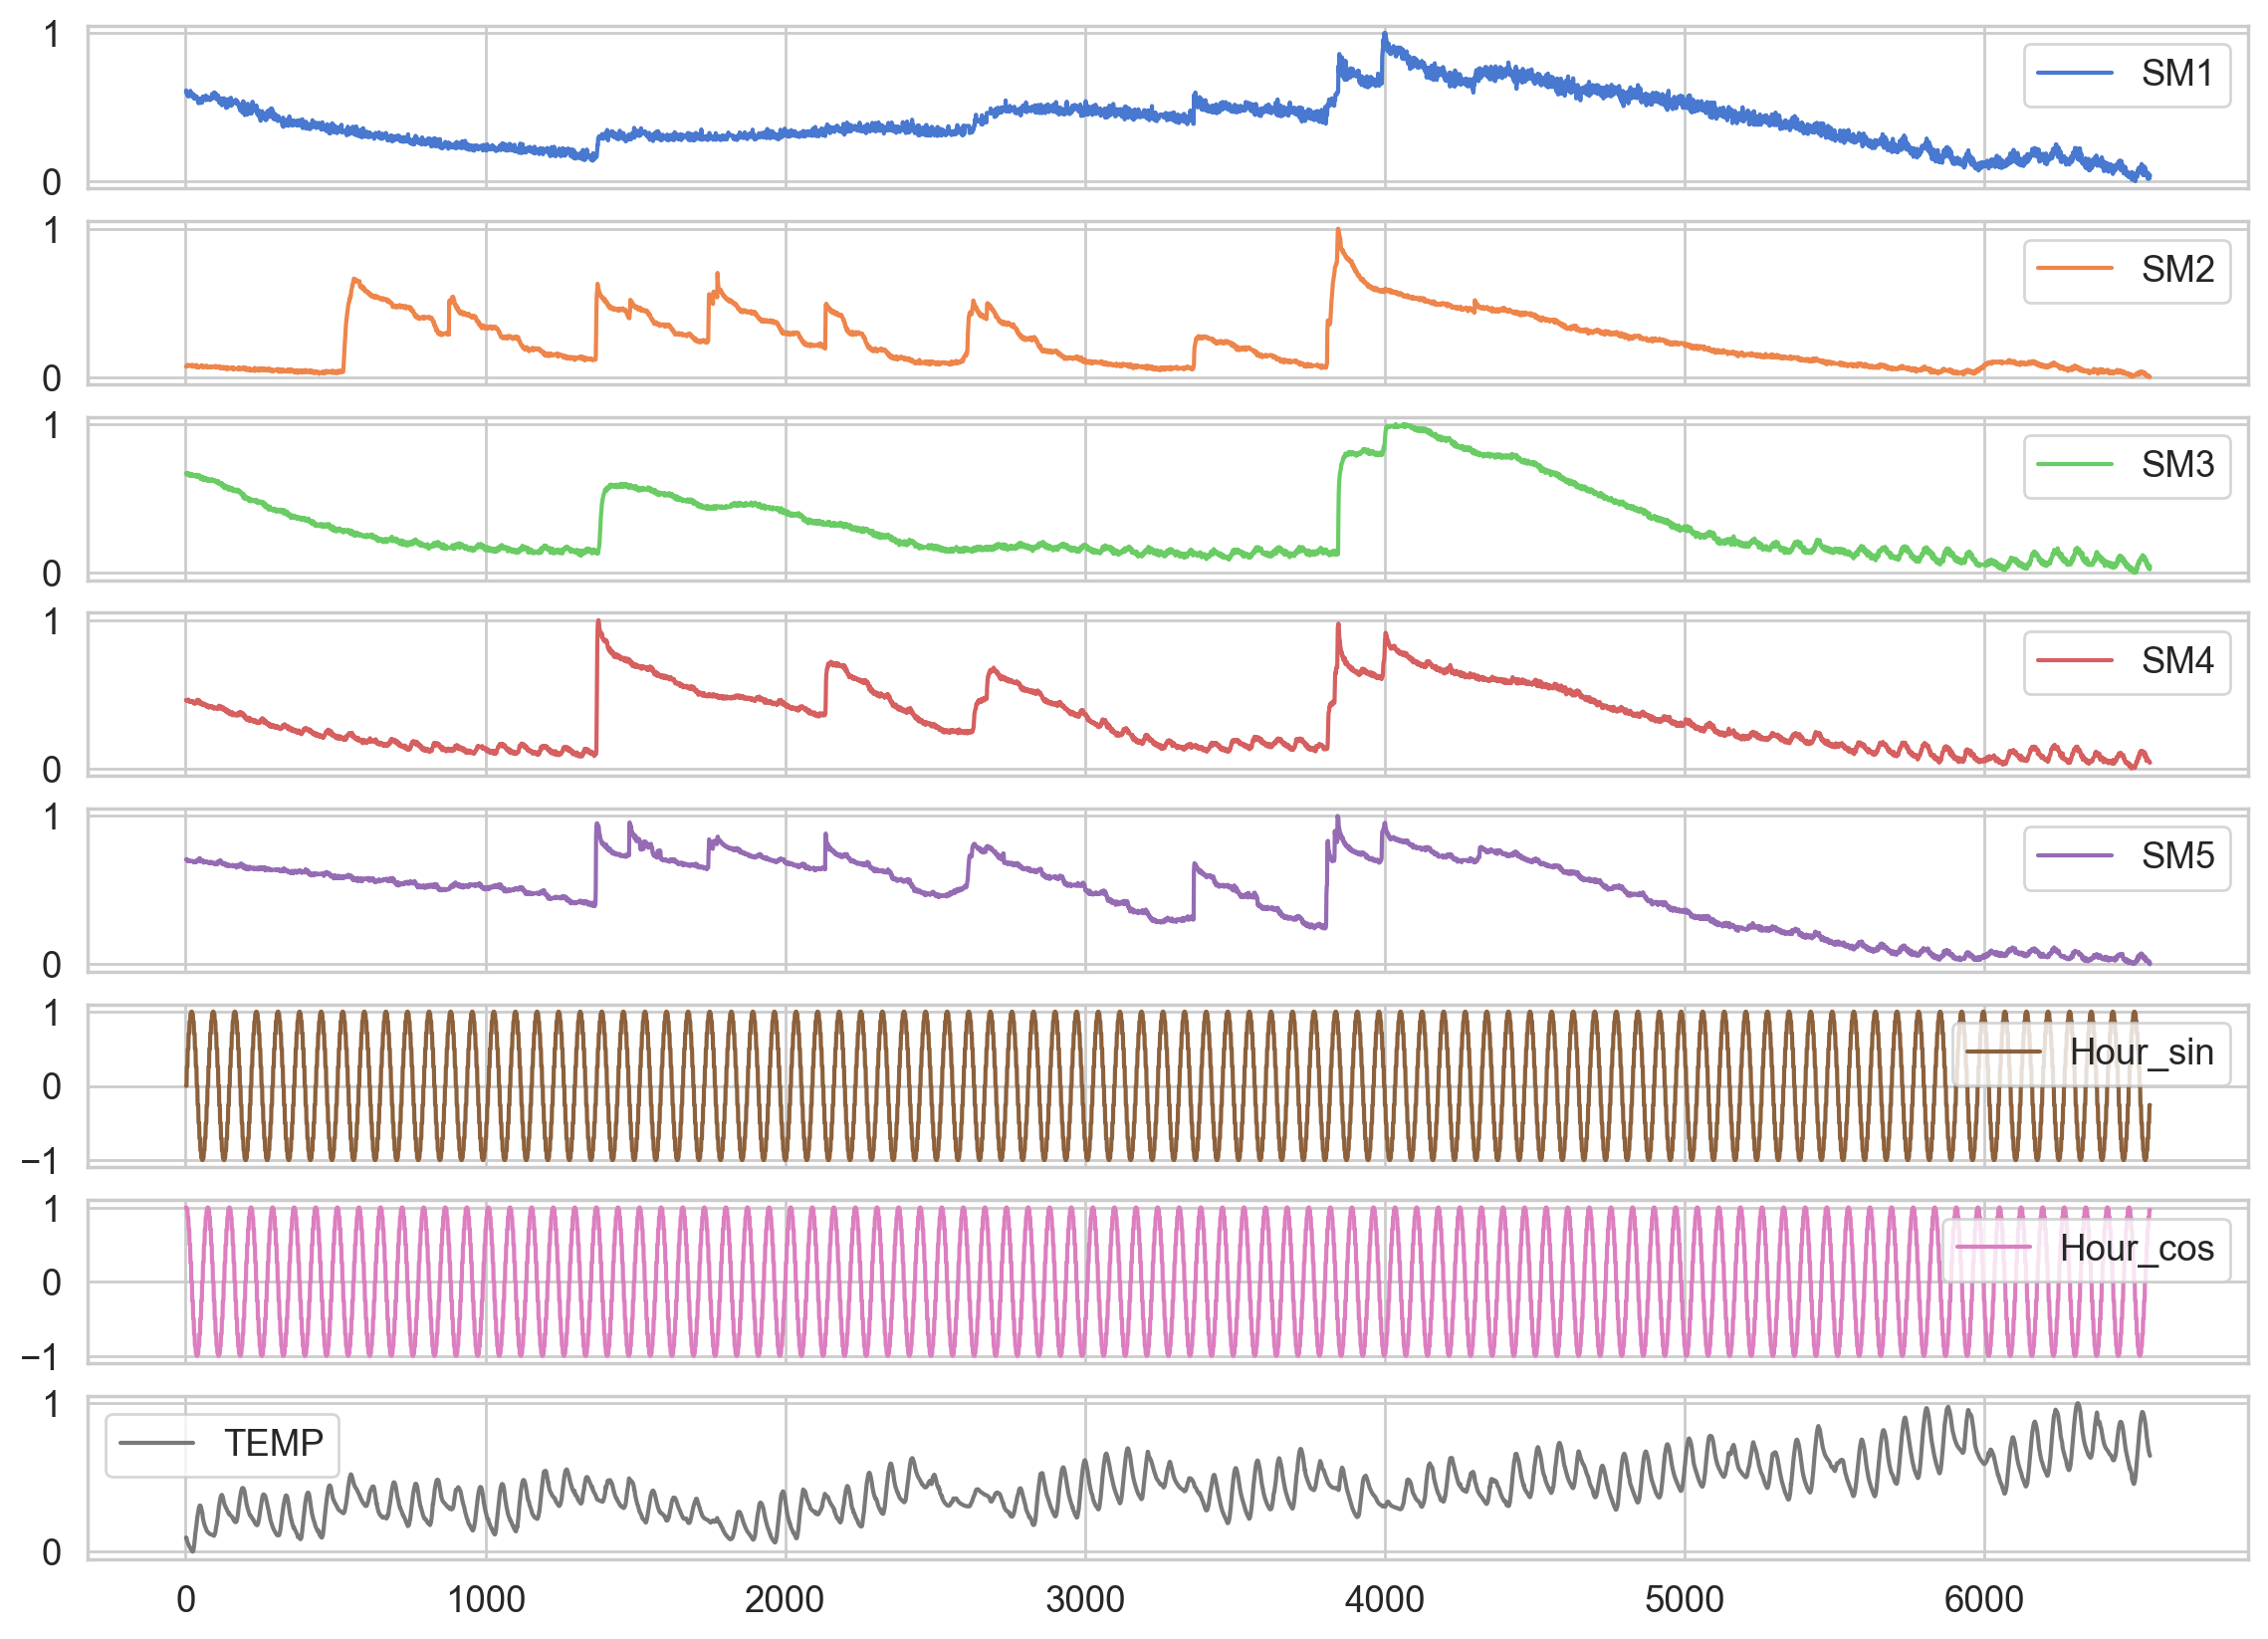

In [167]:
data_sp_multi .plot(subplots=True)


## Feature Enginnering
This is the data processing of a multi variate time serie. To do so, we considere that each X occurence is a sequence of "N history size" of various channels (or variables), and the Y predicition is the "M steps forward", there is the boolean attribute "single_step" that will determinate if we want to predict only the one occurence T+1 after a sequence of [T-history size; T] or we want to predict many steps forward i.e [T+1; T+target_size]

In [190]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step=1, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)  
        data.append(dataset.iloc[indices])

        if single_step:
            labels.append(target.iloc[i+target_size])
        else:
            labels.append(target.iloc[i:i+target_size].to_numpy().flatten())

    return np.array(data), np.array(labels)

In [272]:
# seq_length = 6
# X, y = create_sequences(data_sp_multi, seq_length)

In [174]:
data_sp_multi.columns

Index(['SM1', 'SM2', 'SM3', 'SM4', 'SM5', 'Hour_sin', 'Hour_cos', 'TEMP'], dtype='object')

In [192]:
past_history = 15 # I want to take 20x15 = 5h earlier 
future_target = 6 # I want to predict the next 20x6 = 2h later
STEP = 1 # I took the step as 1; because my data are separated by an interval of 20min so if i want to considere this
# interval i must take the step as 1, however, If not we take a step > 1 to widen the intervals. For exemple, to take 
# a broadly separation between occurences like a hour we must sample the data by a step of 3

x_train_multiple, y_train_multiple = multivariate_data(data_sp_multi, data_sp_multi.iloc[:, 0:5], 0,
                                                   int(data_sp_multi.shape[0] * 0.8), past_history,
                                                   future_target,
                                                   single_step=False)
x_val_multiple, y_val_multiple = multivariate_data(data_sp_multi, data_sp_multi.iloc[:, 0:5],
                                               int(data_sp_multi.shape[0] * 0.8), None, past_history,
                                               future_target,
                                               single_step=False)

In [193]:
print (f"The X training data shape : {x_train_multiple.shape}",
        f"The Y training data shape : {y_train_multiple.shape}" ,
       'Single window of past history : {}'.format(x_train_multiple[0].shape), #shape (6,4) is a slice of one input with a sequence of 6 for each one of the 4 variables (6 sequences refers to 2h data history and 4 refers to four canals SM and TEMP )
       'Target soil moistures to predict : {}'.format(y_train_multiple[0].shape), # shape 12 (SM1 "t+1",SM2 "t+1",SM3 "t+1" , SM1 "t+2" ..........SM3 "t+4")
       sep='\n')

The X training data shape : (5226, 15, 8)
The Y training data shape : (5226, 30)
Single window of past history : (15, 8)
Target soil moistures to predict : (30,)


In [194]:
# LSTM Parameters
BATCH_SIZE = 256
BUFFER_SIZE = 256
EVALUATION_INTERVAL = 200
EPOCHS = 60
PATIENCE = 5

train_data_multiple = tf.data.Dataset.from_tensor_slices((x_train_multiple, y_train_multiple))
train_data_multiple = train_data_multiple.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multiple = tf.data.Dataset.from_tensor_slices((x_val_multiple, y_val_multiple))
val_data_multiple = val_data_multiple.batch(BATCH_SIZE).repeat()

In [195]:
train_data_multiple

<_RepeatDataset element_spec=(TensorSpec(shape=(None, 15, 8), dtype=tf.float64, name=None), TensorSpec(shape=(None, 30), dtype=tf.float64, name=None))>

*  The __from_tensor_slices__ function splits the input tensors along the first dimension (rows) to create a dataset of corresponding input-output pairs.
* The dataset is then cached in memory (__cache() function__), shuffled with the specified buffer size using __suffle()__ : that means after the dataset is being cached in memory, it will suffle them and using the __batch()__ function it will take the defined batch size. Lastly, it is set to repeat indefinitely for multiple epochs of training.

In [196]:
def create_time_steps(length):
    return list(range(-length, 0))

In [197]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(18, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
                 label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

In [198]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multiple.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(30))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae', metrics=[tf.metrics.MeanAbsoluteError()])
print(multi_step_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 32)            5248      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 30)                510       
                                                                 
Total params: 8,894
Trainable params: 8,894
Non-trainable params: 0
_________________________________________________________________
None


In [199]:
for x, y in val_data_multiple.take(1):
    print (multi_step_model.predict(x).shape) # test the predict with the initialised weights to check the output shape

8/8 [==============================] - 1s 9ms/step
(256, 30)


In [200]:
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience = 3, restore_best_weights=True)
multi_step_history = multi_step_model.fit(train_data_multiple,
                                          epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multiple,
                                          validation_steps=EVALUATION_INTERVAL,
                                          callbacks=[early_stopping])

Epoch 1/60


200/200 [==============================] - 14s 46ms/step - loss: 0.1513 - mean_absolute_error: 0.1513 - val_loss: 0.0703 - val_mean_absolute_error: 0.0703
Epoch 2/60
200/200 [==============================] - 9s 43ms/step - loss: 0.0811 - mean_absolute_error: 0.0811 - val_loss: 0.0622 - val_mean_absolute_error: 0.0622
Epoch 3/60
200/200 [==============================] - 9s 43ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - val_loss: 0.0649 - val_mean_absolute_error: 0.0649
Epoch 4/60
200/200 [==============================] - 9s 43ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - val_loss: 0.0489 - val_mean_absolute_error: 0.0489
Epoch 5/60
200/200 [==============================] - 8s 40ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - val_loss: 0.0473 - val_mean_absolute_error: 0.0473
Epoch 6/60
200/200 [==============================] - 8s 40ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - val_loss: 0.0429 - val_mean_absolute_error: 0.0429
Epoch 7/60
200/200 [

In [218]:
multi_step_model.save("pfe_model_lstm_saved_8_inputs")

INFO:tensorflow:Assets written to: pfe_model_lstm_saved_8_inputs\assets


INFO:tensorflow:Assets written to: pfe_model_lstm_saved_8_inputs\assets


In [203]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

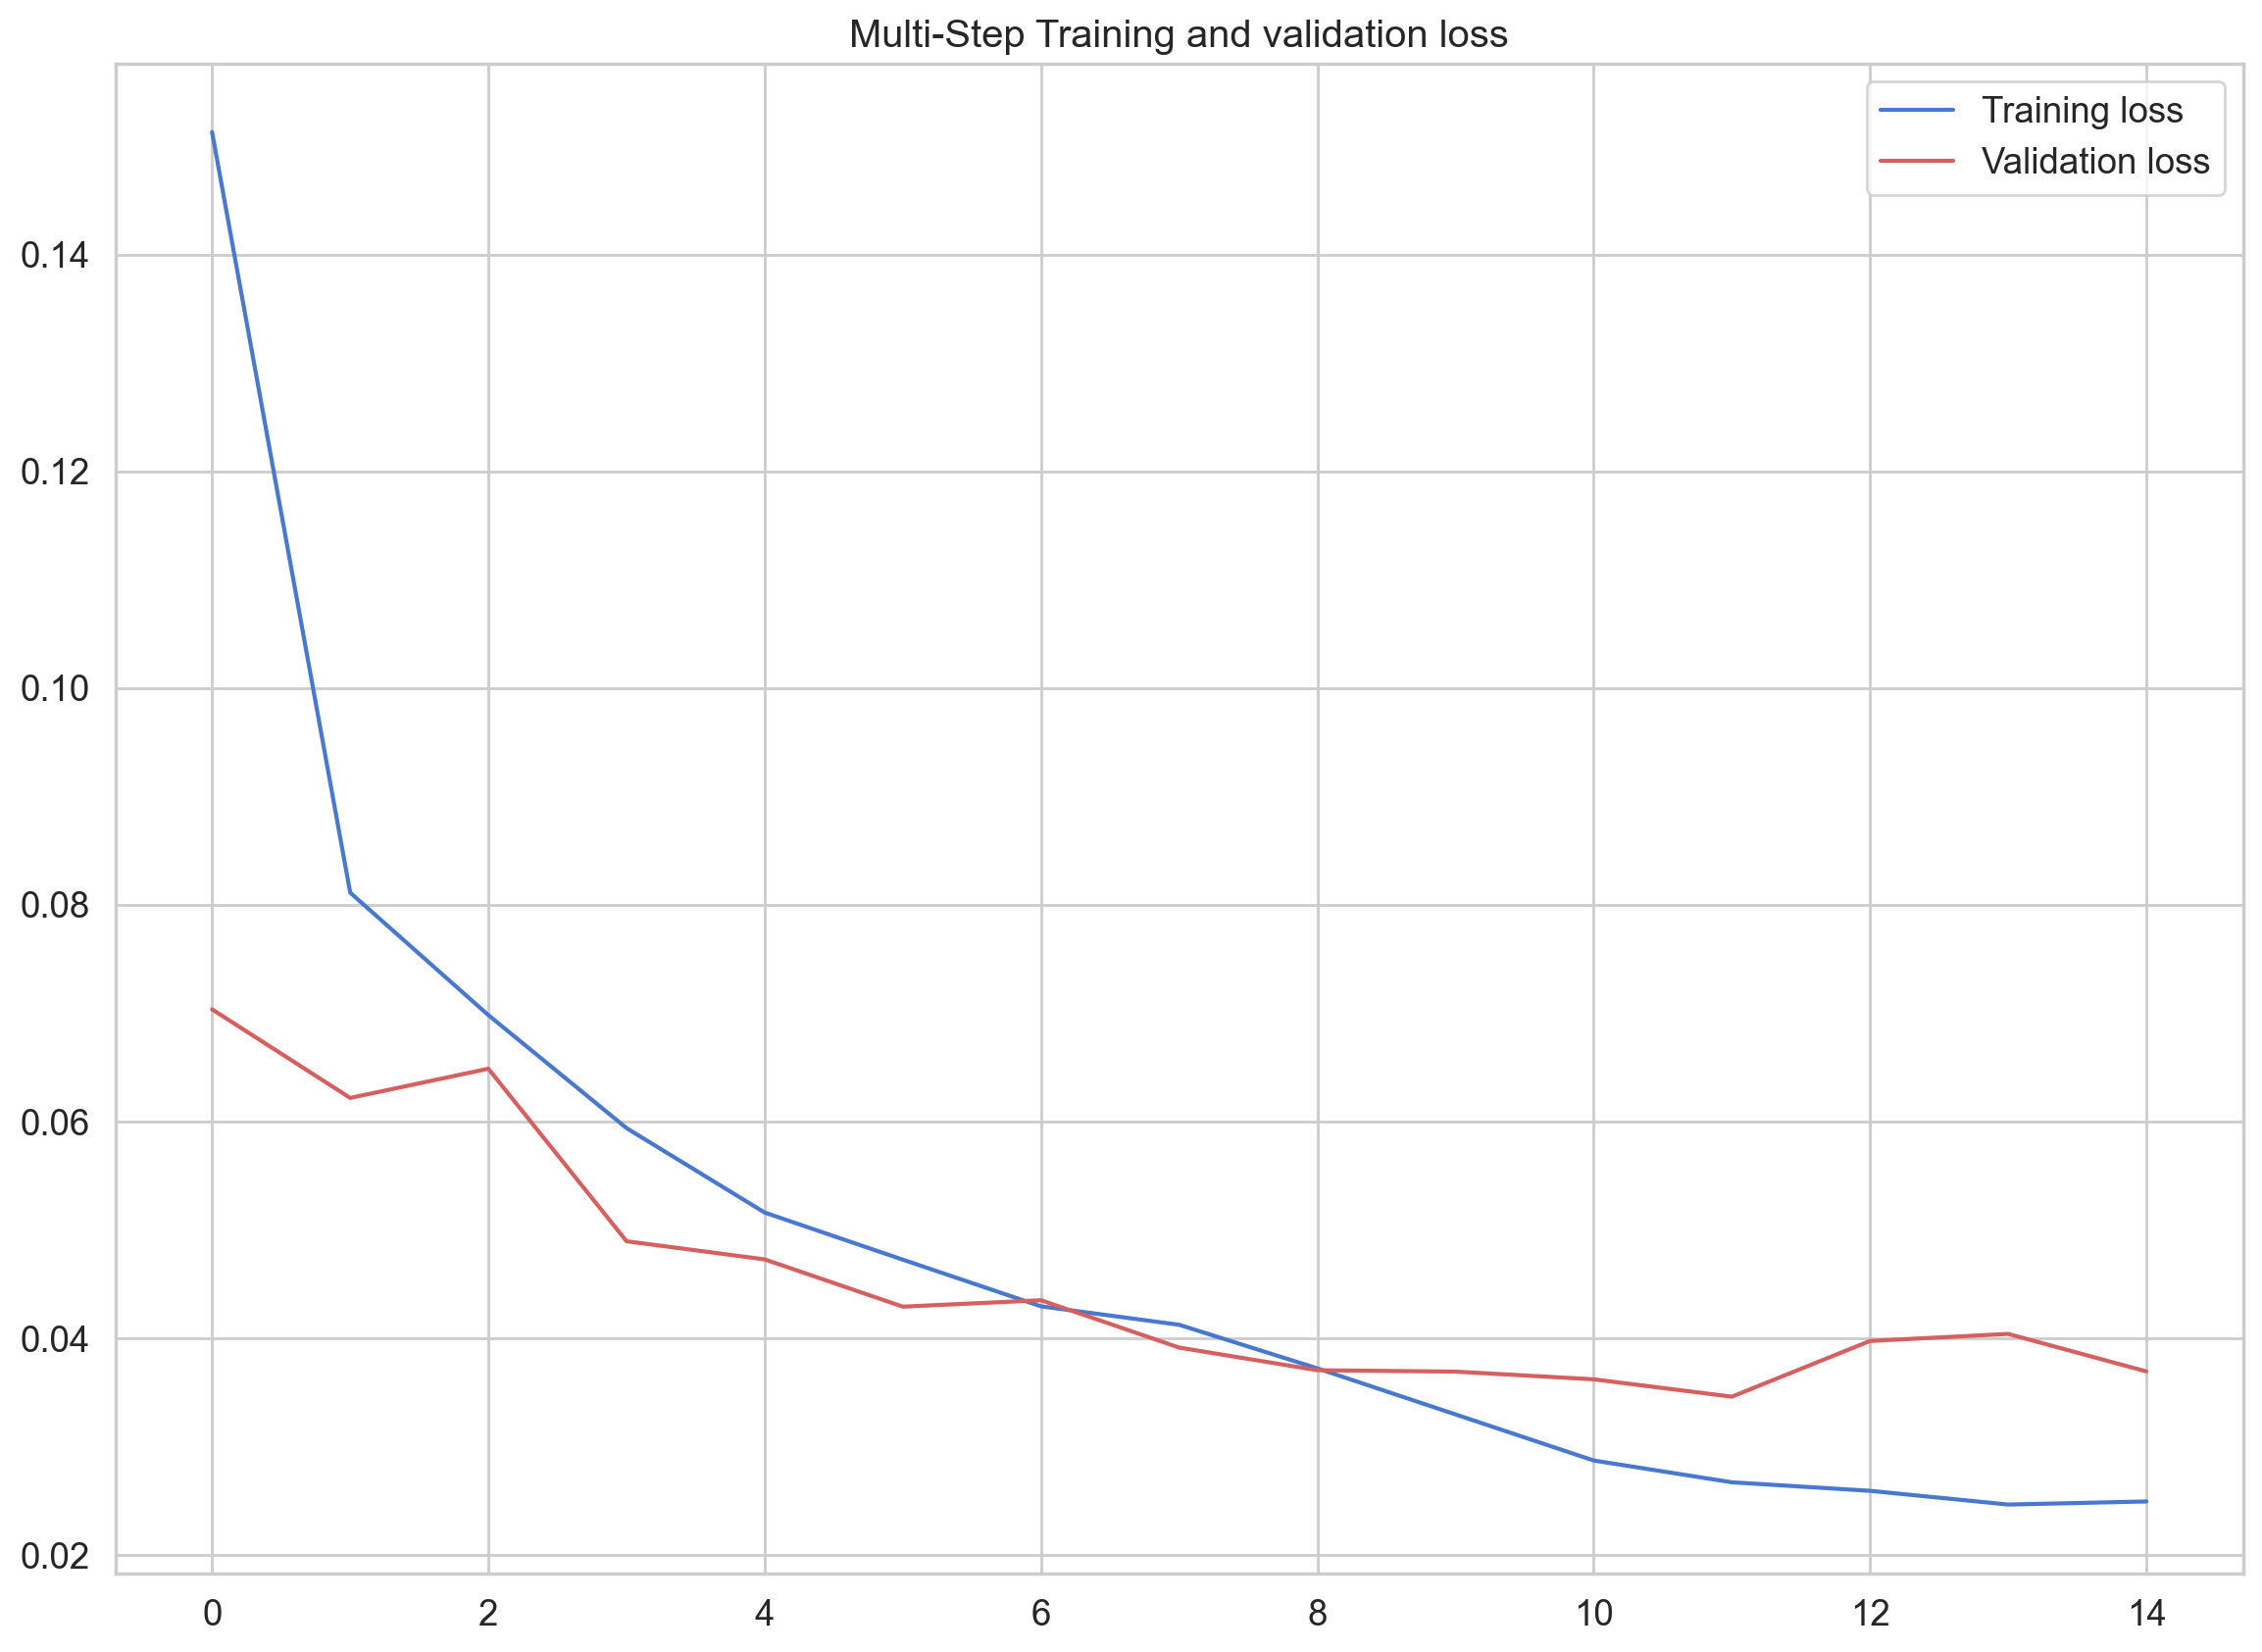

In [204]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')


## Import model

In [53]:
model_path = 'pfe_model_lstm_saved'

# Load the model
multi_step_model = tf.keras.models.load_model(model_path)

In [205]:
def ReverseScale(scaled, min, max):

    return scaled * (max - min) + min

In [215]:
def test_plot_soil_moisture(SM : str) : 
 table= {"SM1" : 0, "SM2" : 1 , "SM3" : 2,"SM4" : 3 , "SM5" : 4}
 table2= {"SM1" : [min_SM1, max_SM1], "SM2" : [min_SM2,max_SM2] , "SM3" : [min_SM3, max_SM3] ,
 "SM4" : [min_SM4, max_SM4], "SM5" : [min_SM5, max_SM5]}

 for x, y in val_data_multiple.take(1): # we take one batch for test
    
    plt.figure(figsize=(18, 6))
    num_in = create_time_steps(15) # create time steps for historical soil moisture (before 20min *15 = 5h)
    num_out = 6 

    scaled_history = np.array(tf.reshape(x[0],[-1])[table[SM]::8]) # get the first slice from the x batch containing a (15,8) scaled historical and take just the relevent SM that we want to predict
    scaled_true = np.array(y[0][table[SM]::5]) # get the true SM from T to T+6 that is the next 2h

    true = ReverseScale(scaled_true, table2[SM][0], table2[SM][1])
    history = ReverseScale(scaled_history, table2[SM][0], table2[SM][1])

    plt.plot(num_in,history , label='History')
    plt.plot(np.arange(num_out)/STEP, true, 'g',
           label='True Future')
    scaled_prediction = np.array(multi_step_model.predict(x)[0][table[SM]::5])
    prediction = ReverseScale(scaled_prediction, table2[SM][0], table2[SM][1])

    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, prediction,"r",
                 label='Predicted Future Soil Moisture ')
    plt.legend(loc='upper left')
    plt.show()

8/8 [==============================] - 0s 5ms/step


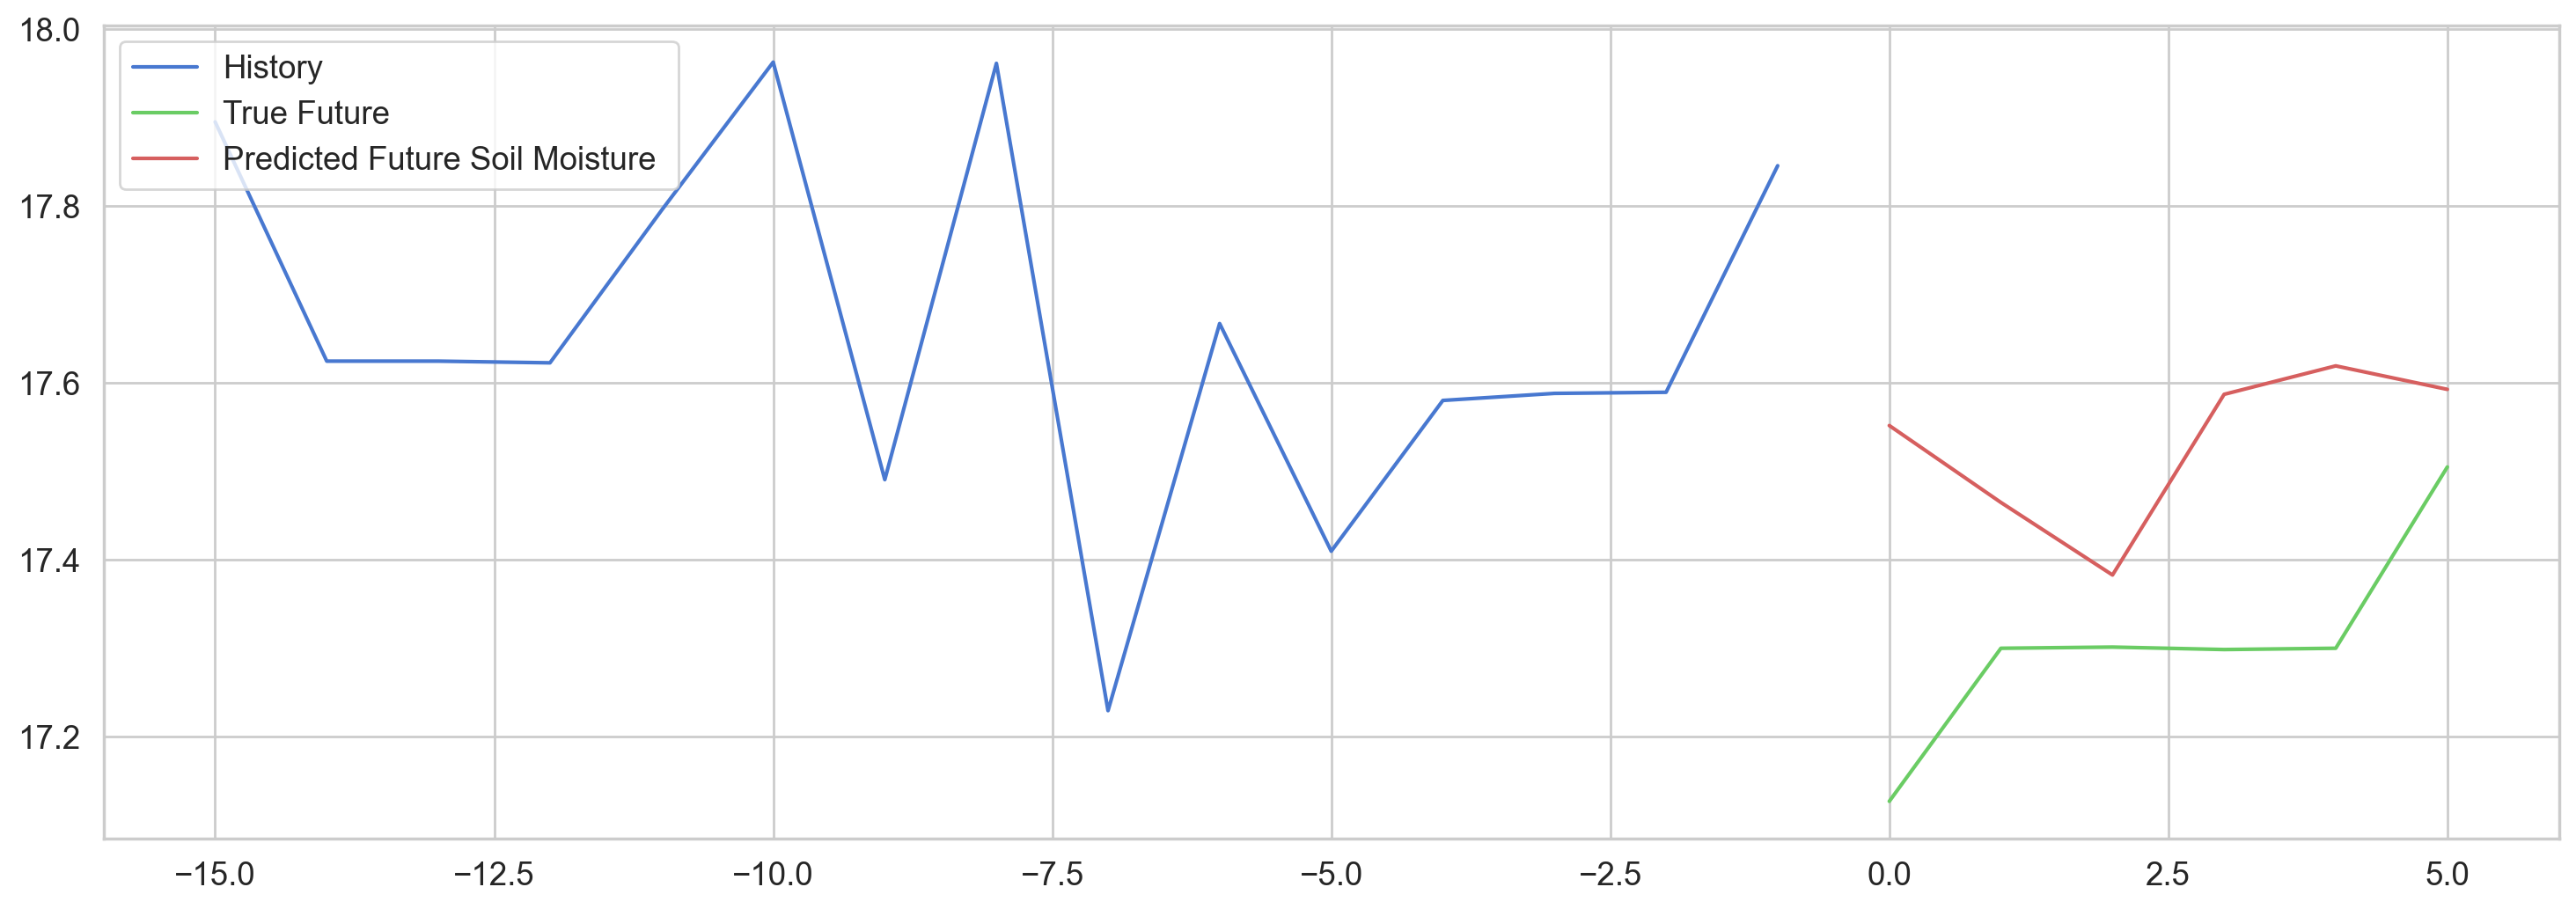

In [217]:
test_plot_soil_moisture("SM5")

INFO:tensorflow:Assets written to: pfe_model_lstm_saved\assets


INFO:tensorflow:Assets written to: pfe_model_lstm_saved\assets


## Kriging Estimation

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [64]:
predict_validation = multi_step_model.predict(x_val_multiple)

41/41 [==============================] - 0s 4ms/step


In [115]:
table= ["SM1" , "SM2", "SM3","SM1" , "SM2", "SM3"  ]
table2= {"SM1" : [min_SM1, max_SM1], "SM2" : [min_SM2,max_SM2] , "SM3" : [min_SM3, max_SM3]}

SM_scaled= np.array(predict_validation[0][0:6])
SM_transformed = []

for i, x in enumerate(SM_scaled) :
    SM_transformed.append(ReverseScale(x, table2[table[i]][0], table2[table[i]][1]))
#just a sample of 3 measures
x = np.array([75, 75,75, 225, 225, 225])
y = np.array([100,300, 500, 100, 300, 500])
SM_transformed = np.array(SM_transformed)

In [117]:
SM_transformed

array([23.81695041, 17.25578002, 10.70507048, 23.5981388 , 17.12518151,
       10.79986978])

In [116]:
SM_transformed.mean()

17.21683183274318

In [106]:
x

array([ 75, 225,  75, 225,  75, 225])

Text(0.5, 1.0, 'Measured Soil Moisture')

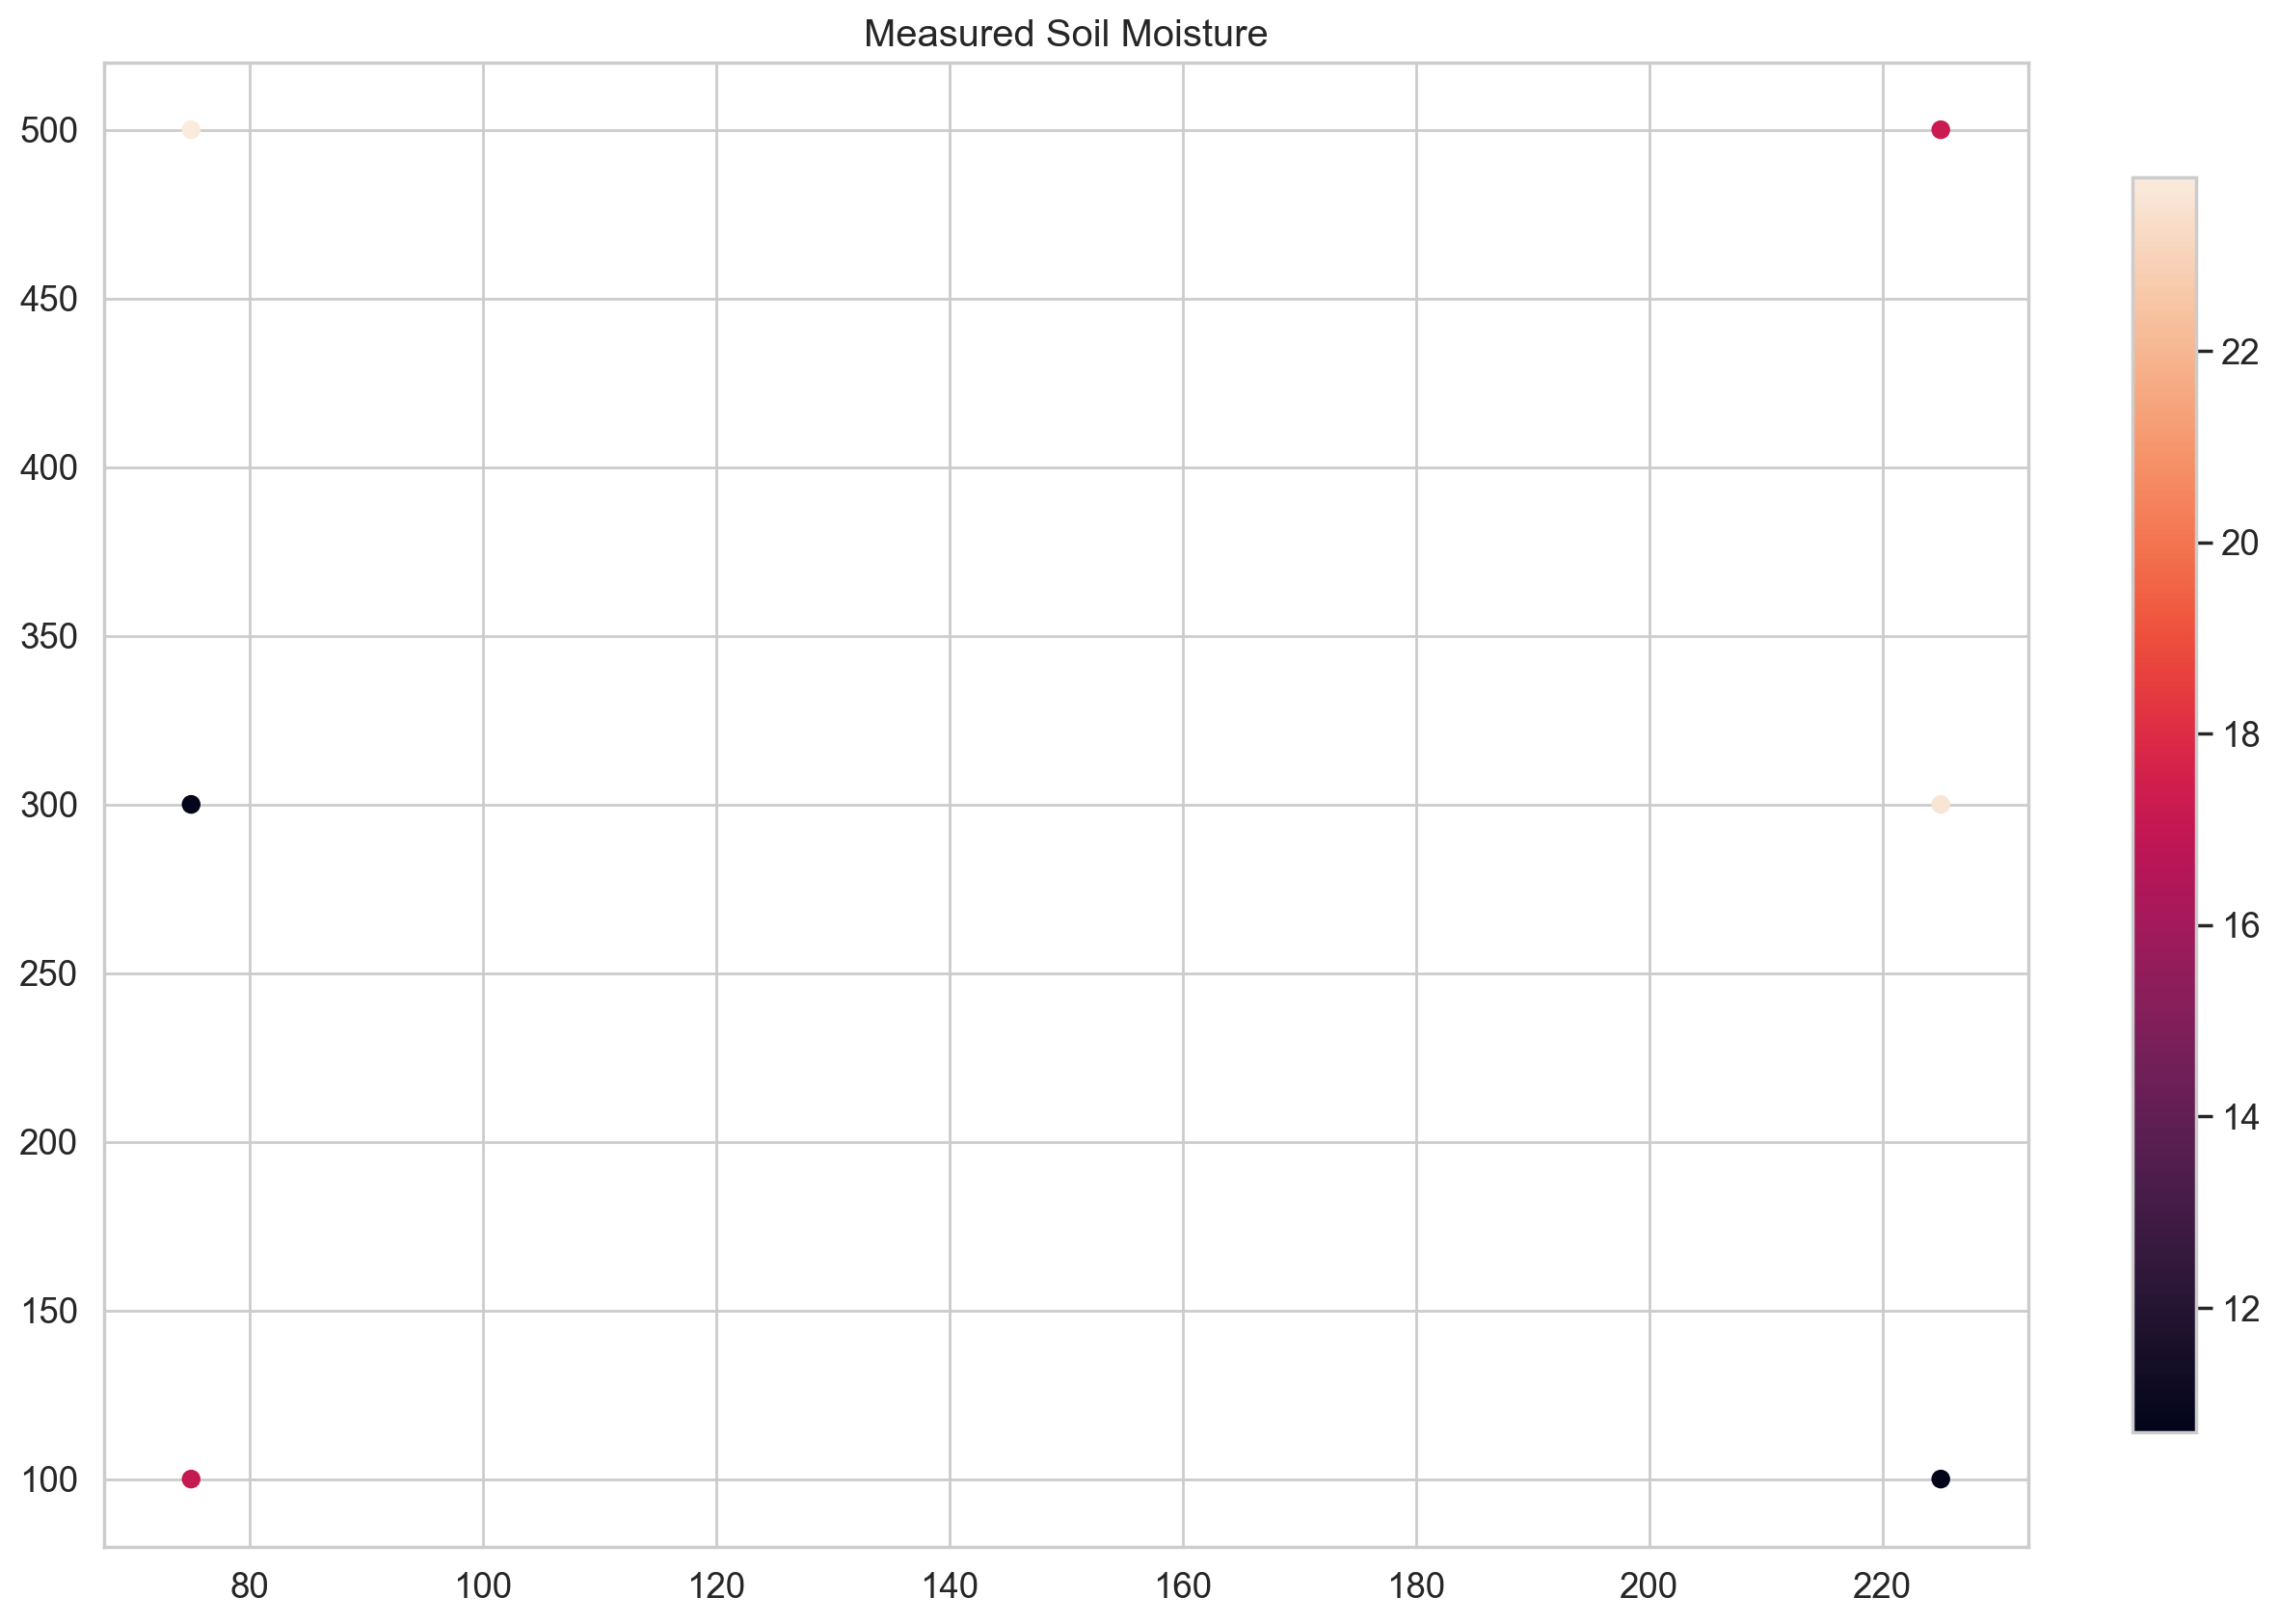

In [107]:
cax = plt.scatter(x, y, c=SM_transformed)
cbar = plt.colorbar(cax, fraction=0.03)
plt.title('Measured Soil Moisture')

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 8.466073849906087
Full Sill: 36.69045130566551
Range: 43.10760720930321
Nugget: 28.224377455759427 



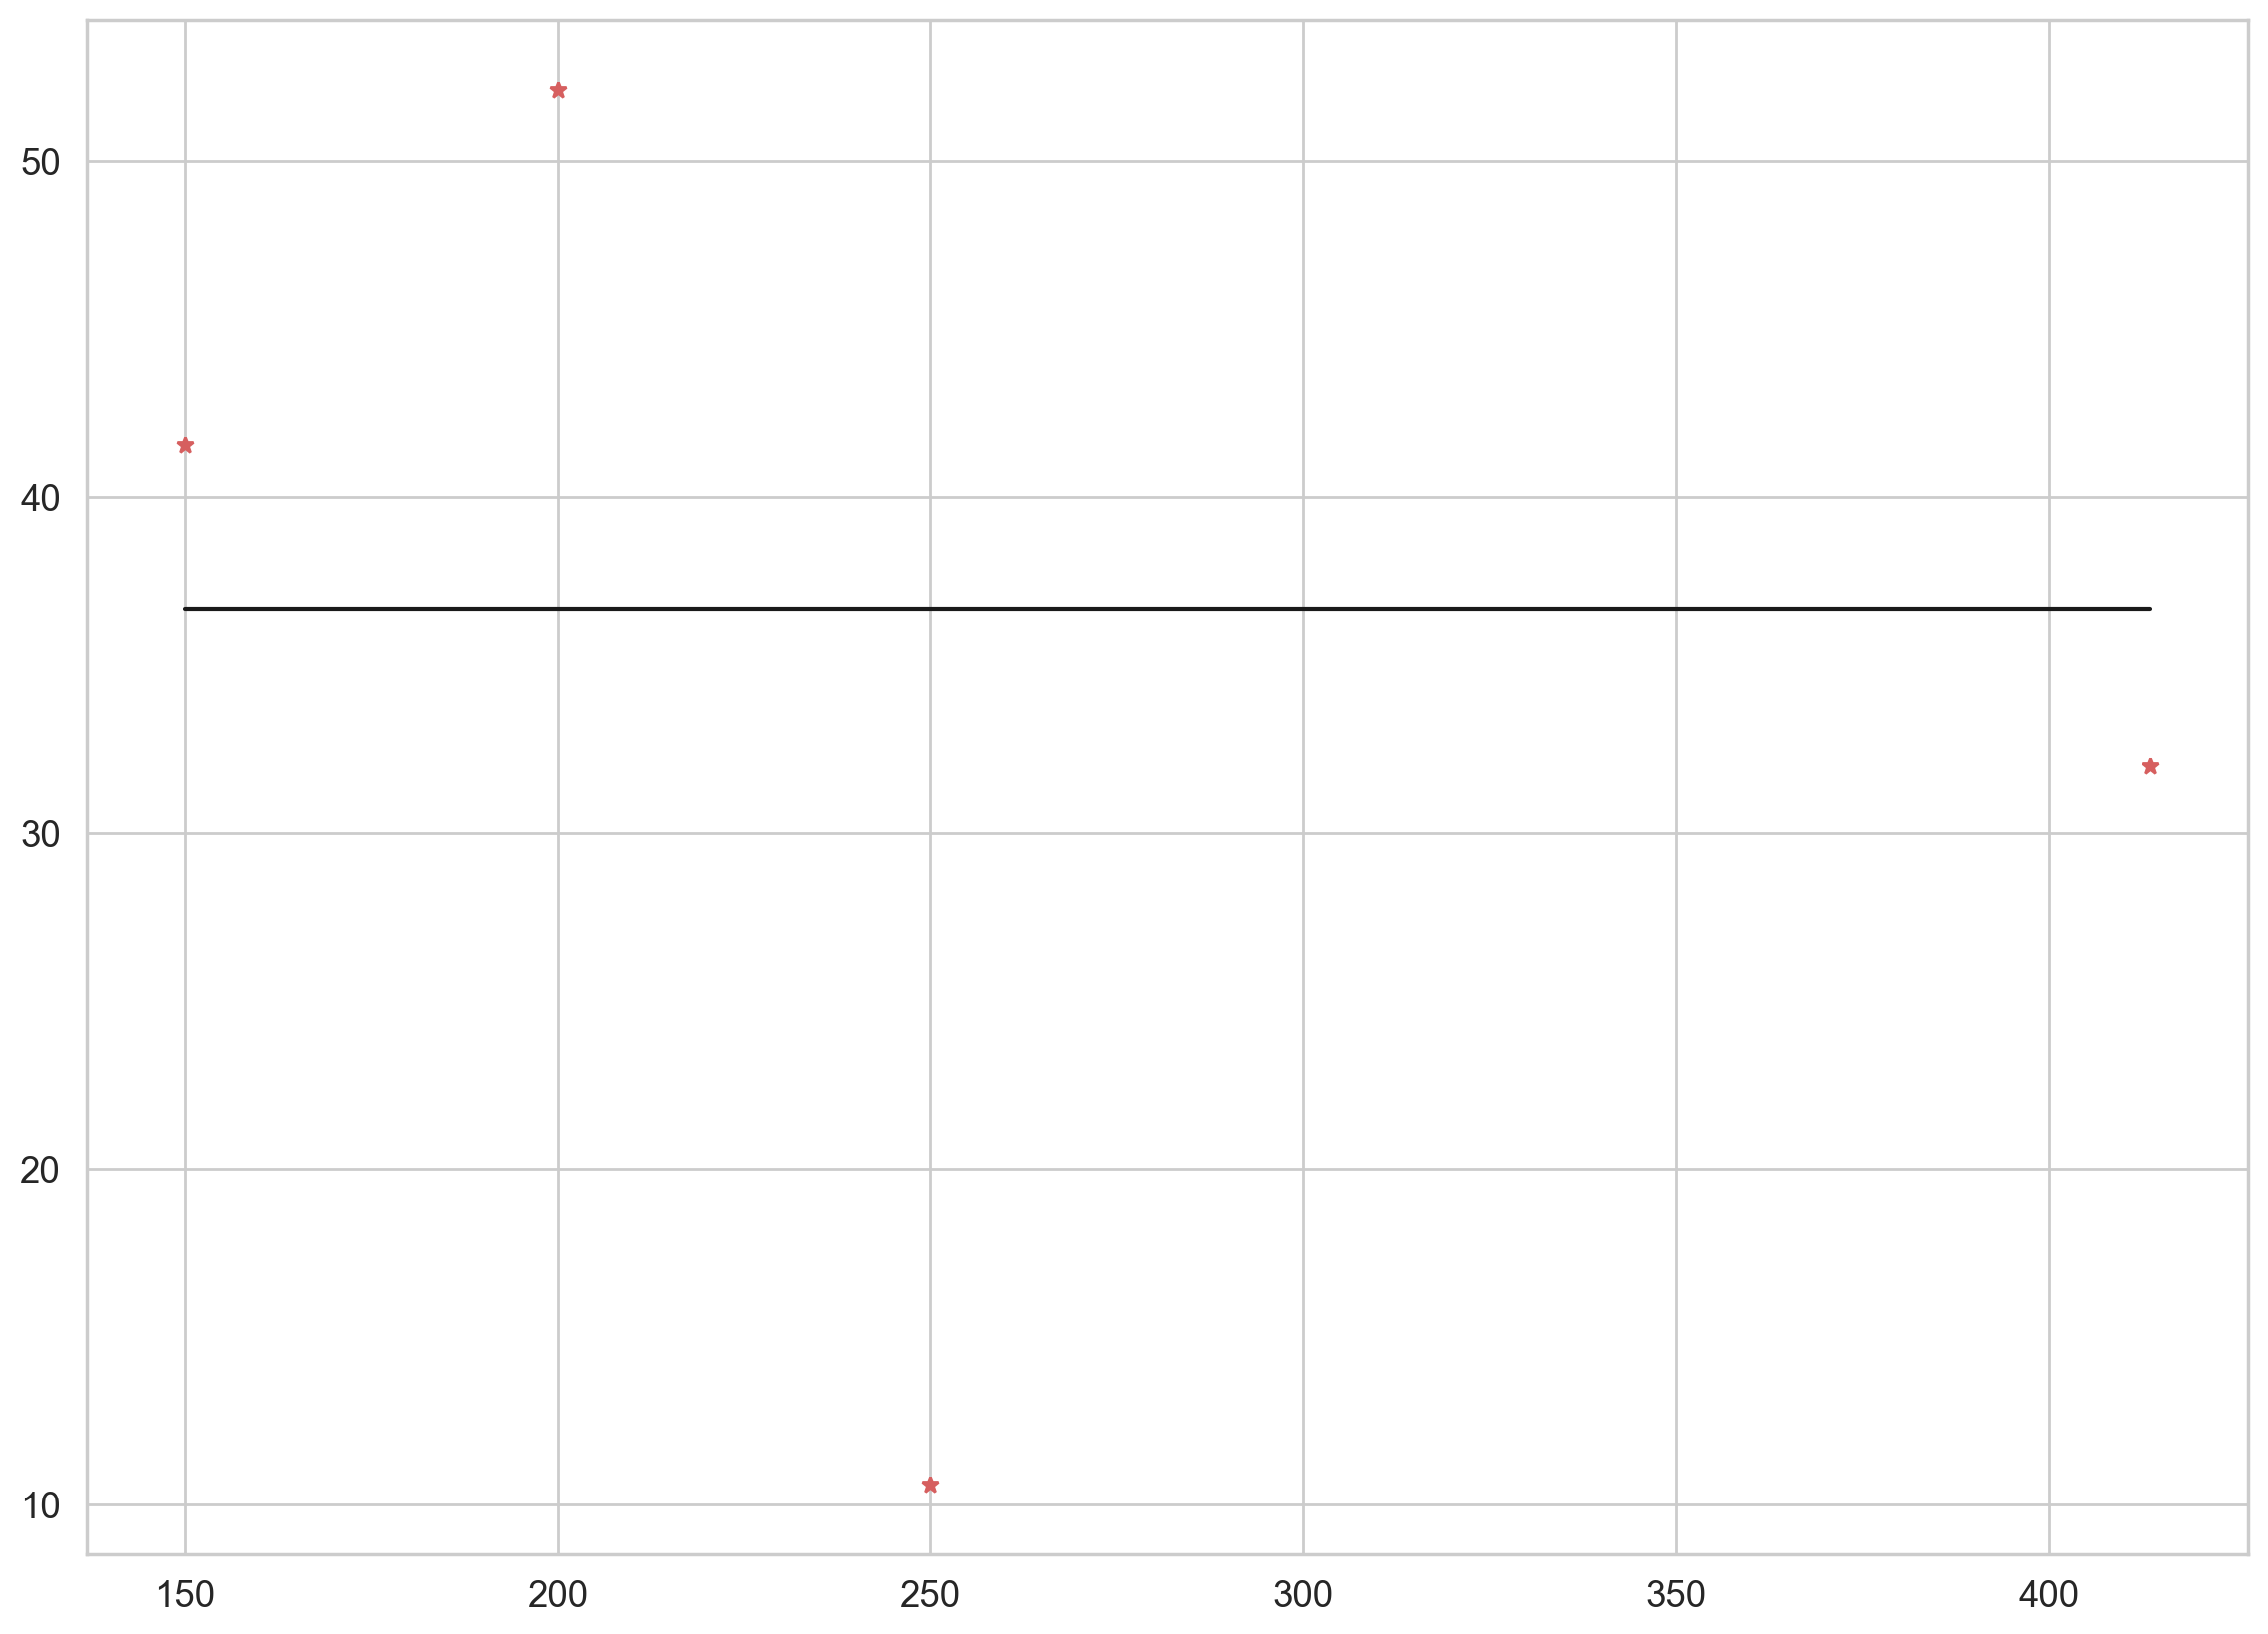

Calculating statistics on variogram model fit...


In [108]:
OK = OrdinaryKriging(
    x, 
    y, 
    SM_transformed, 
    variogram_model='gaussian',
    verbose=True,
    enable_plotting=True,
    nlags=10,
)

In [109]:
OK.variogram_model_parameters

array([ 8.46607385, 43.10760721, 28.22437746])

In [110]:
gridx = np.arange(0, 300, 10, dtype='float64')
gridy = np.arange(0, 600, 10, dtype='float64')
zstar, ss = OK.execute("grid", gridx, gridy)

Executing Ordinary Kriging...



In [111]:
print(zstar.shape)
print(ss.shape)

(60, 30)
(60, 30)


Text(0.5, 1.0, 'Soil Moisture Distribution')

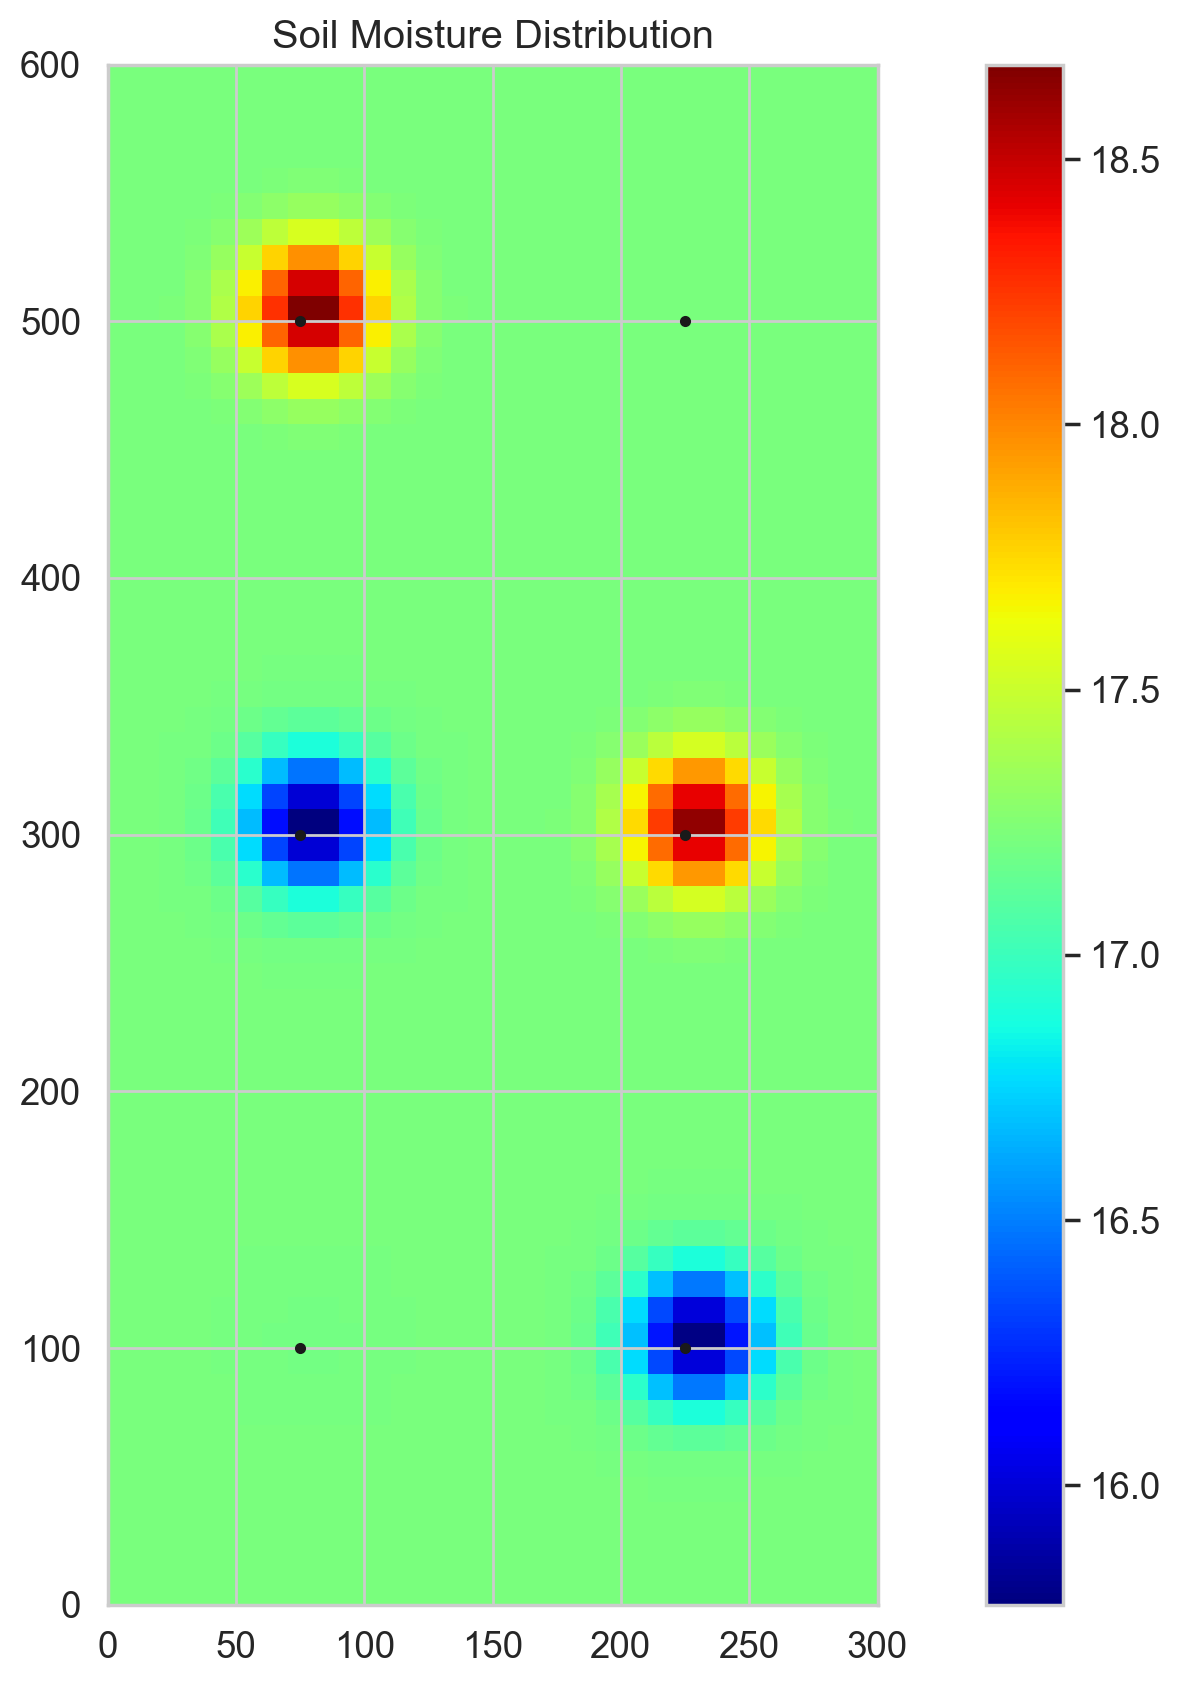

In [112]:
cax = plt.imshow(zstar, extent=(0, 300, 0, 600), origin='lower',  cmap='jet')
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Soil Moisture Distribution')

Text(0.5, 1.0, 'Soil Moisture standard devation')

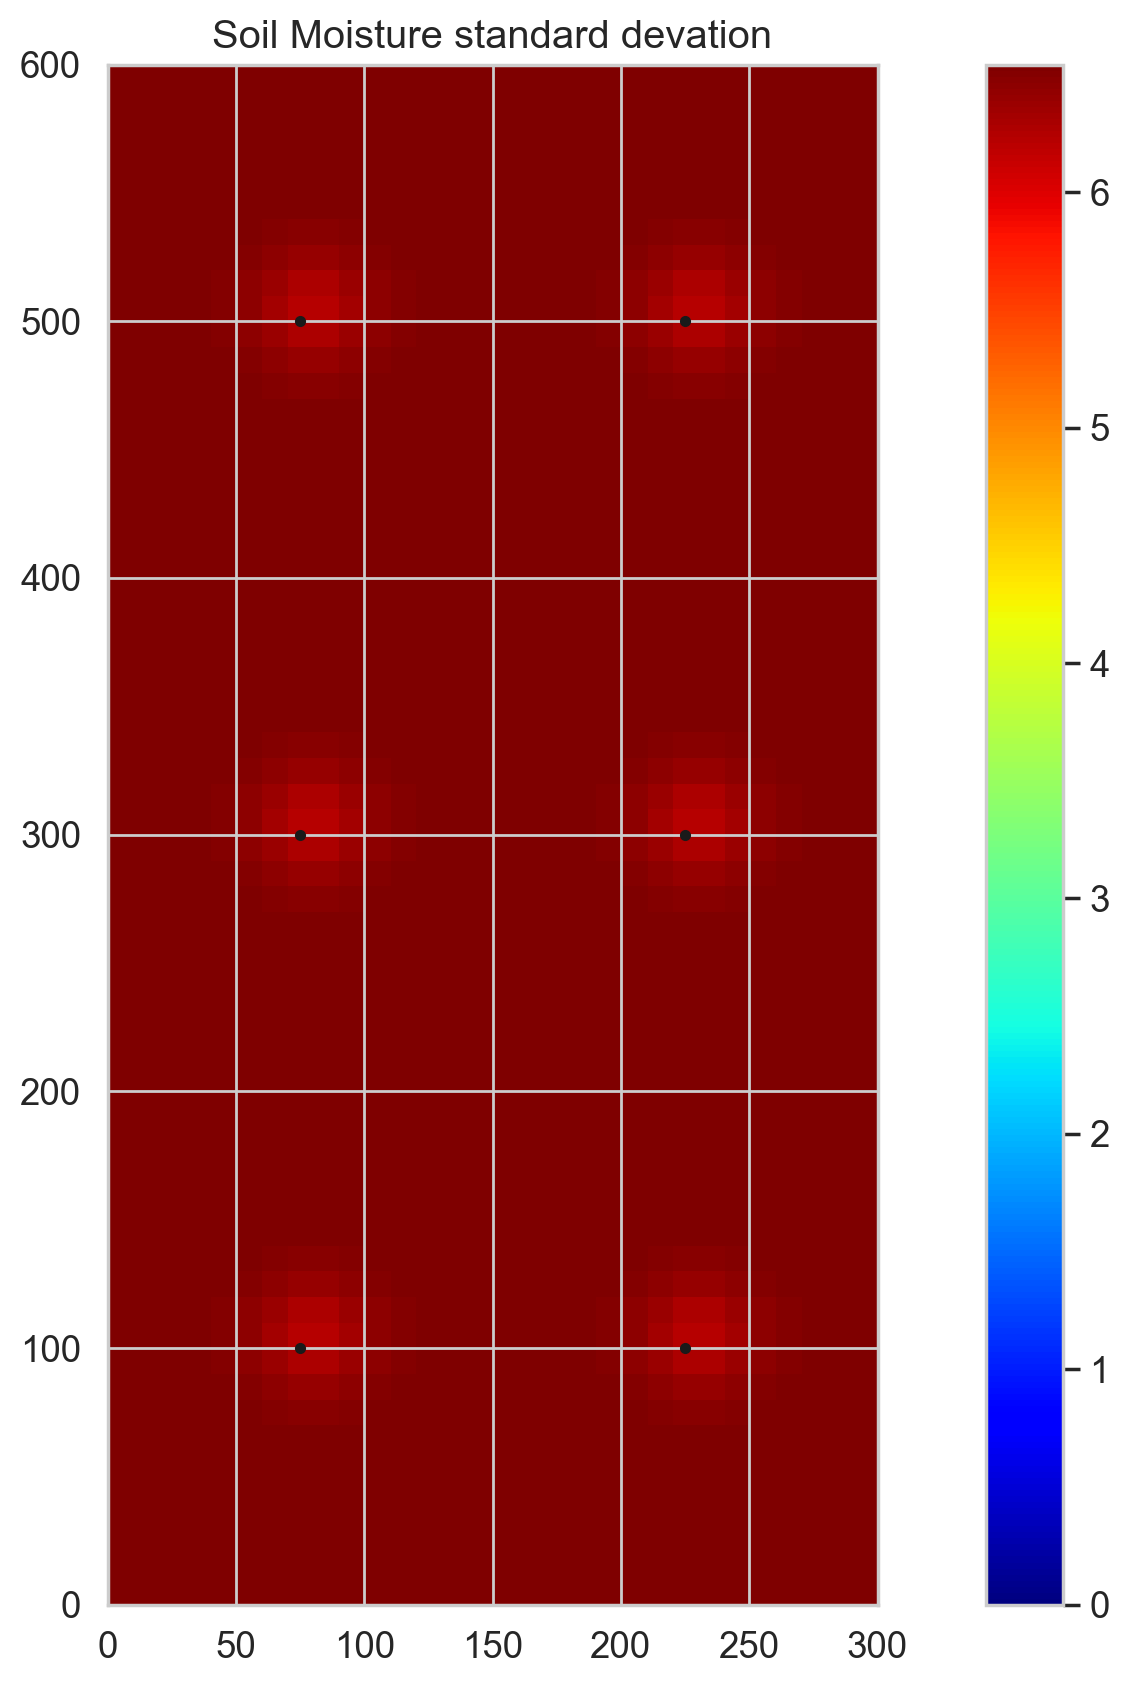

In [114]:
cax = plt.imshow(np.sqrt(ss), extent=(0, 300, 0, 600), origin='lower', vmin = 0, cmap="jet")
plt.scatter(x, y, c='k', marker='.')
cbar=plt.colorbar(cax)
plt.title('Soil Moisture standard devation')

In [ ]:
OK.variogram_model_parameters